## Undergraduate Thesis Project

>**Predicting Deadlock (Run-time Error) in Concurrent Systems**
>
>**Training Part (Neural Network)**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout, Input
from tensorflow.keras import Sequential
import tensorflow as tf

### Loading Data

In [8]:
df = pd.read_csv('one_hot_RebecaDataset.csv')
df.head()

,Call_1_fork_0,Call_1_fork_1,Call_1_fork_2,Call_1_fork_3,Call_2_fork_0,Call_2_fork_1,Call_2_fork_2,Call_2_fork_3,Call_3_fork_0,Call_3_fork_1,...,Call_8_fork_0,Call_8_fork_1,Call_8_fork_2,Call_8_fork_3,Func_Call_1,Func_Call_2,Func_Call_3,Func_Call_4,Deadlock_0,Deadlock_1
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,3,2,3,1,0
1,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,2,2,1,3,1,0
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,2,2,1,3,1,0
3,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,2,3,2,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,2,2,3,1,0


In [9]:
X = df.copy()
del X['Deadlock_0']
del X['Deadlock_1']
y = df[['Deadlock_0','Deadlock_1']]

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2)
data = (xTrain, xTest, yTrain, yTest)

In [11]:
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(266, 36) (67, 36) (266, 2) (67, 2)


### Training and Evaluating Functions

In [12]:
def train(model, epoch, validation, batch, xTrain, yTrain, xTest, yTest, verbose=1, plot=0):
    xTrain = np.asarray(xTrain).astype(np.float32)

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=150)
    if validation == 0:
        trained = model.fit(xTrain, yTrain, epochs=epoch, shuffle=True, validation_split=validation, batch_size=batch, verbose=verbose, callbacks=[callback])
    else:
        trained = model.fit(xTrain, yTrain, epochs=epoch, shuffle=True, validation_data=(xTest, yTest), batch_size=batch, verbose=verbose, callbacks=[callback])
    # if plot:
        # plt.title('NN Model')
        # plt.plot(y_train, label='actual')
        # plt.plot(np.array(model(x_train)), label='predicted')
        # plt.legend()
        # plt.show()
    return trained

def evaluateModel(trainedModel, xTest, yTest, plot):
    print("Evaluating Model:")
    evaluation = trainedModel.model.evaluate(xTest, yTest)
    print(evaluation)
    
    pred = trainedModel.model(np.array(xTest))

    # if plot:
    #     plt.figure(figsize=(15, 5))
    #     plt.ylim((-0.1,1))
    #     plt.plot(y_test, label='actual')
    #     plt.plot(pred, label='prediction')
    #     plt.legend()
    #     plt.title(str(name) + ' Evaluation')
    #     plt.show()
    return evaluation, [pred, y_test]

def showTrainLossHistory(trained, title=None, showValidation=True):
    plt.plot(trained.history['loss'])
    if(showValidation):
        plt.plot(trained.history['val_loss'])      
        plt.legend(['train_loss', 'validation_loss'])
    else:
        plt.legend(['train_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    if(title):
        plt.title(title)

In [13]:
def trainModel(numEpoch, validation, batchSize, verbose, xTrain, yTrain, xTest, yTest, lossFunc, plot, activationLoss):
    modelDeadlock = Sequential([
        Dense(5, input_dim = 36, activation = activationLoss),
        Dense(3, activation = 'tanh'),
        Dense(2, activation = 'sigmoid')
        ])
    
    modelDeadlock.compile(loss = lossFunc, optimizer='adam', metrics=['accuracy'])
    _trained = train(modelDeadlock, numEpoch, validation, batchSize, xTrain, yTrain, xTest, yTest, verbose, plot)

    if plot:
        plt.figure(figsize=(10, 5))
        showTrainLossHistory(_trained, 'Loss on Training Data', validation!=0)

        plt.show()

    return _trained

### Training and Evaluating Functions

In [16]:
def trainAll(data, plot, activationLoss):
    loss = 'binary_crossentropy'

    xTrain, xTest, yTrain, yTest = data

    numEpoch = 100
    validation = 1
    batchSize = 6
    verbose = 0

    # Train
    # print('*******************Training model*******************')
    __trained = trainModel(numEpoch, validation, batchSize, verbose, xTrain, yTrain, xTest, yTest, loss, plot, activationLoss)
    __trained.model.trainable = False
    
    # Eval
    Evaluation, temp = evaluateModel(__trained, xTest, yTest, plot)

    return np.array(Evaluation), temp

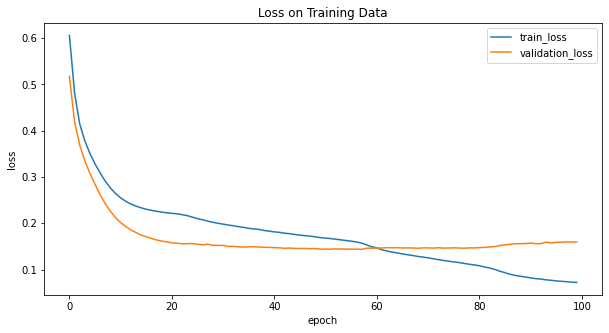

Evaluating Model:
3/3 [==============================] - 0s 2ms/step - loss: 0.1598 - accuracy: 0.9552
[0.15980158746242523, 0.9552238583564758]


In [17]:
activationLoss = 'relu'
   
eval, temp = trainAll(data, 1, activationLoss)